# Rules
https://en.wikipedia.org/wiki/War_(card_game)

- The "war" process can be repeated in this case of back to back ties
- To construct this game, we will create:
    + Card class
    + Deck class
    + Player class
    + Game logic

# Card Class

In [16]:
import random
suits = ('Hearts', 'Diamonds', 'Spades', 'Clubs')
ranks = ('Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'Jack', 'Queen', 'King', 'Ace')
values = {'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 
            'Nine':9, 'Ten':10, 'Jack':11, 'Queen':12, 'King':13, 'Ace':14}

In [17]:
class Card:
    
    def __init__(self,suit,rank):
        self.suit = suit
        self.rank = rank
        self.value = values[rank]
    
    def __str__(self):
        return self.rank + " of " + self.suit

# Deck class
- Deck class:
    - Instanctiate a new deck with:
        + Create 52 Card objects
        + Hold as a list of Card objects
    - Shuffle a Deck through a method call
        + `random` library `shuffle` function
    - Deal cards from the Deck object
        + Pop method from card list

In [37]:
class Deck:
    
    def __init__(self):
        
        self.all_cards = []
        
        for suit in suits:
            for rank in ranks:
                # Create the card objects
                create_card = Card(suit,rank)
                self.all_cards.append(create_card)
    
    def shuffle(self):
        random.shuffle(self.all_cards)
    #grabbing a card from somewhere in the list
    def deal_one(self):
        return self.all_cards.pop()
        

# Player Class
- Player class:
    + This class will be used to hold a player's current list of cards
    + A player should be able to add or remove cards from their "hand" (list of Card object)
    + Player to be able to add a single card or mutiple cards to their list
    + Translating a Deck/Hand of cards with a top and bottom, to a Python list
        + Remove card from top
        + Add card to the bottom
Note: If want to add mutiple cards to hand, use `extand` instead of `append`

In [57]:
class Player:
    
    def __init__(self,name):
        self.name = name
        self.all_cards = []
        
    def remove_one(self):
        return self.all_cards.pop(0)
    
    def add_cards(self,new_cards):
        if type(new_cards) == type([]):
            #List of mutiple cards
            self.all_cards.extend(new_cards)
        else:
            #For a single card
            self.all_cards.append(new_cards)
    
    def __str__(self):
        return f"Player {self.name} has {len(self.all_cards)} cards"

# Game logic
- We have 2 players, 1 deck (shuffled). Split the deck between player one and player two and stack half the deck to each player.
Check condition for game on (check for 0 card - each round)

- Each player put a card on table and we compare them, and two case will occur:
    - Not tie: Player wins can add both those cards to his deck 
    - Tie: draw 5 additional card to compare (can mutiple tie in a round) until one player win all (a player loses if they don't have at least 5 cards to play)

If after round a player have 0 card in hand -> **Game Over**

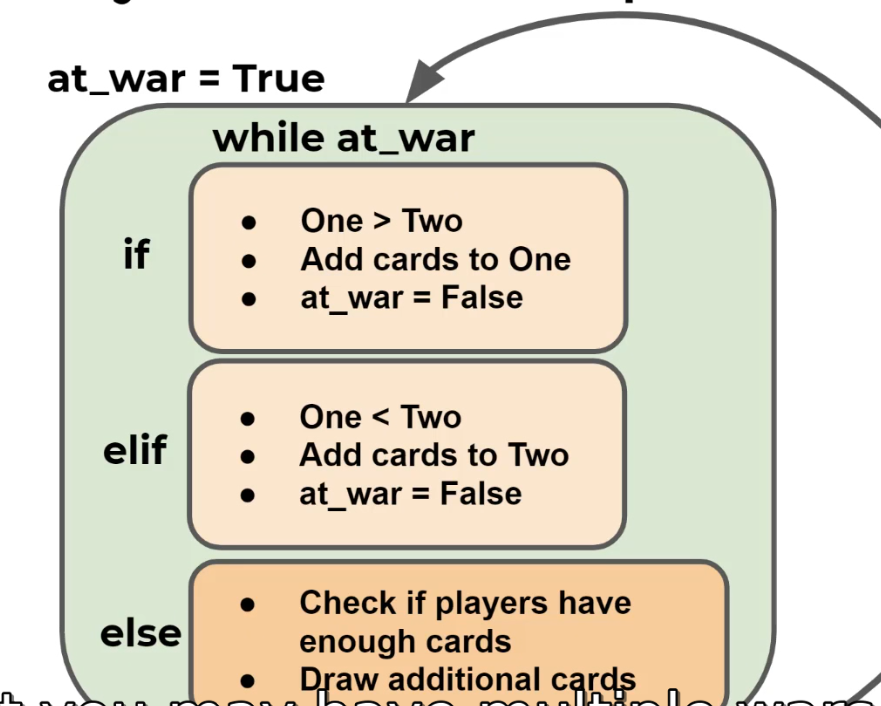
    

In [92]:

# Game setup
player1 = Player('One')
player2 = Player('Two')

new_deck = Deck()
new_deck.shuffle()

#Split the deck
for x in range(26):
    player1.add_cards(new_deck.deal_one())
    player2.add_cards(new_deck.deal_one())
    


In [93]:
game_on = True

In [94]:
#Play game
round_num = 0
while game_on:
    round_num += 1
    print(f"Rounds {round_num}")
    
    if len(player1.all_cards) == 0:
        print("Player 1 out of cards! Player 2 wins")
        game_on = False
        break
    
    if len(player2.all_cards) == 0:
        print("Player 2 out of cards! Player 1 wins")
        game_on = False
        break
    
    #Start a new round
    at_war = True
    #Draw from player's deck to player's hand and play
    player1_cards = []
    player1_cards.append(player1.remove_one())
    
    player2_cards = []
    player2_cards.append(player2.remove_one())
    
    #On table game
    while at_war:
        #Using -1  index instead 0 because avoid case
        # p1[Q] p2[Q] -> compare Q and Q -> Tie -> Add card
        # p1[Q,J,K,4] p2[Q,3,J,A] -> compare Q and Q -> Tie -> Add card
        # -> Infinity Loop -> Bug game
        
        #Player 1 win
        if player1_cards[-1].value > player2_cards[-1].value:
            player1.add_cards(player1_cards)
            player1.add_cards(player2_cards)
            at_war = False
        #Player 2 win
        elif player2_cards[-1].value > player1_cards[-1].value:
            player2.add_cards(player1_cards)
            player2.add_cards(player2_cards)
            at_war = False
        # Tie
        else:
            print("WAR")
            #Check player has at least 5 cards to war?
            if len(player1.all_cards) < 5:
                print("Player 1 unable to play war!")
                print("Player 2 wins!")
                game_on = False
                break
            elif len(player2.all_cards) < 5:
                print("Player 2 unable to play war")
                print("Player 1 wins")
                game_on = False
                break
            #Draw extra cards
            else:
                for x in range(5):
                    player1_cards.append(player1.remove_one())
                    player2_cards.append(player2.remove_one())
                    

            

    
        


Rounds 1
Rounds 2
Rounds 3
Rounds 4
Rounds 5
Rounds 6
Rounds 7
Rounds 8
Rounds 9
Rounds 10
Rounds 11
Rounds 12
Rounds 13
Rounds 14
Rounds 15
Rounds 16
Rounds 17
Rounds 18
Rounds 19
Rounds 20
Rounds 21
Rounds 22
Rounds 23
Rounds 24
WAR
Rounds 25
Rounds 26
Rounds 27
Rounds 28
Rounds 29
Rounds 30
Rounds 31
Rounds 32
Rounds 33
Rounds 34
Rounds 35
Rounds 36
Rounds 37
Rounds 38
Rounds 39
Rounds 40
Rounds 41
Rounds 42
Rounds 43
Rounds 44
Rounds 45
Rounds 46
Rounds 47
Rounds 48
Rounds 49
WAR
Rounds 50
Rounds 51
Rounds 52
Rounds 53
Rounds 54
Rounds 55
Rounds 56
Rounds 57
Rounds 58
Rounds 59
Rounds 60
Rounds 61
WAR
Rounds 62
Rounds 63
Rounds 64
Rounds 65
Rounds 66
Rounds 67
WAR
Rounds 68
Rounds 69
Rounds 70
Rounds 71
Rounds 72
Rounds 73
Rounds 74
Rounds 75
Rounds 76
Rounds 77
Rounds 78
Rounds 79
Rounds 80
Rounds 81
Rounds 82
Rounds 83
Rounds 84
Rounds 85
Rounds 86
Rounds 87
Rounds 88
Rounds 89
Rounds 90
Rounds 91
Rounds 92
Rounds 93
Rounds 94
Rounds 95
Rounds 96
Rounds 97
Rounds 98
Rounds 99
Rou